<a href="https://colab.research.google.com/github/Srinu2307/Week-1--P5-Crop-fertilizer-recommendation-system-using-ML/blob/main/Crop_%26_fertilizer_recommendation_system_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Crop & fertilizer recommendation system using ML





Crop and fertilizer recommendation systems leverage machine learning to optimize agricultural practices. By analyzing various factors like soil properties, climate conditions, and historical data, these systems can:

**Suggest suitable crops**: Predict which crops will thrive best in specific conditions, maximizing yield and minimizing risk.

**Recommend optimal fertilizers**: Determine the right type and amount of fertilizer for each crop, improving nutrient uptake and reducing environmental impact.

**Forecast crop yields**: Estimate potential yields based on current conditions and historical trends, aiding in planning and decision-making.

These systems empower farmers with data-driven insights, leading to increased efficiency, reduced costs, and improved sustainability in agriculture.

#Importing python libraies to implementing the data sets and visuvalizations

numpy, pandas, matplotlib.pyplot, and seaborn are imported to handle data processing, analysis, and visualization.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the Data Sets

The dataset Crop_recommendation.csv is loaded using pd.read_csv().


In [ ]:
crop = pd.read_csv("/content/Crop_recommendation.csv")

#Previewing Data
Display the first and last 5 rows of the dataset, respectively.

In [ ]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
crop.tail()


,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


#Dataset Dimensions

provides the number of rows and columns in the dataset.

In [ ]:
crop.shape


(2200, 8)

#Dataset Information
Gives an overview of the dataset, such as data types and non-null counts.


In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


#Handling Missing Values
crop.isnull() checks for missing values, while crop.isnull().sum() provides the total count of missing values per column.

In [ ]:
crop.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [ ]:
crop.isnull().sum()


,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


#Checking Duplicates:

crop.duplicated() identifies duplicate rows, and crop.duplicated().sum() counts them.


In [ ]:
crop.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2195,False
2196,False
2197,False
2198,False


In [ ]:
crop.duplicated().sum()

0

#Descriptive Statistics:

crop.describe() provides statistical insights, such as mean, standard deviation, min, and max values.

In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


#Column Information:

crop.columns lists all available columns in the dataset.

In [ ]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

#Label Distribution:

crop['label'].value_counts() checks the frequency distribution of different crop labels in the dataset.

In [ ]:
crop['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


#crop recommendation data set using the python libraies to implementaion the visuvalizations of data in difference way



By using the seaborn and matplotlib libraies to the visuvalizations

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style


In [ ]:
sns.set_style('whitegrid')

# Select numerical features for visualization

# Create histograms for each numerical feature



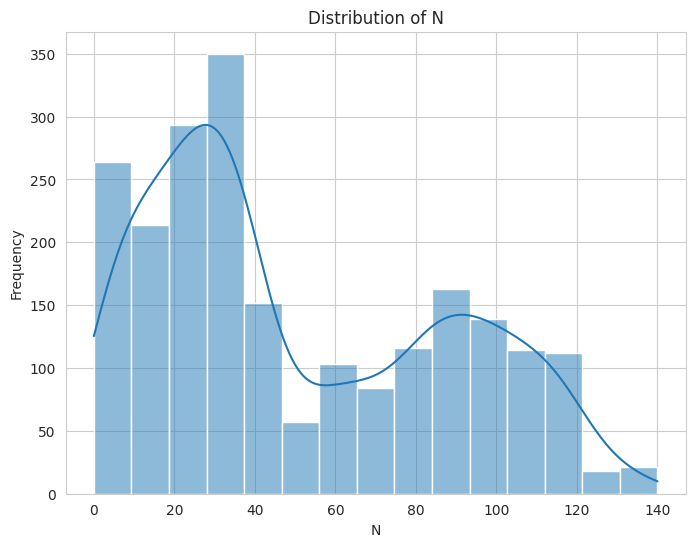

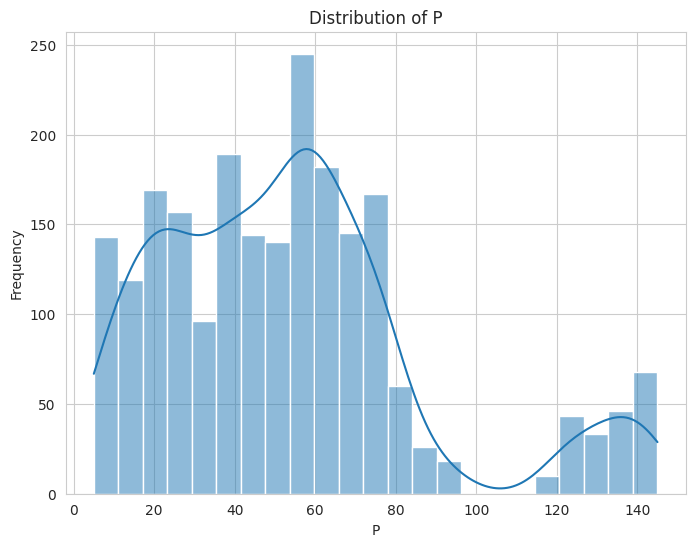

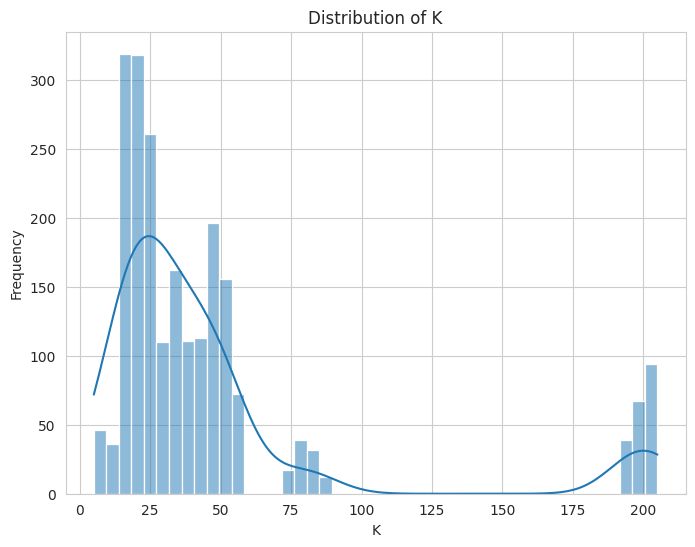

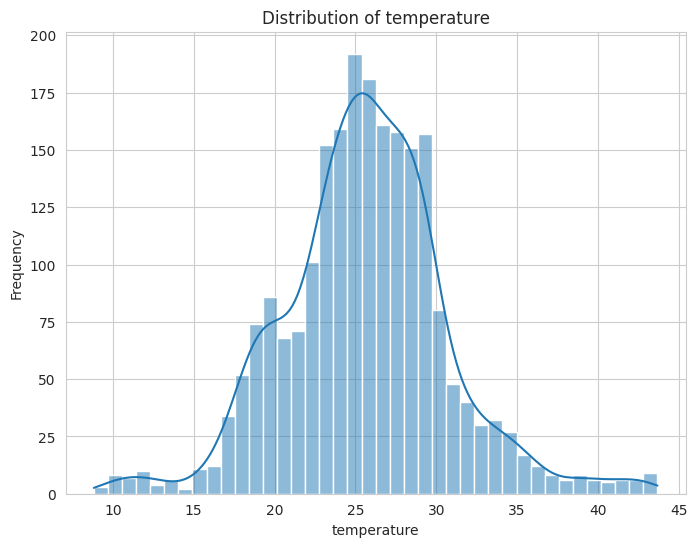

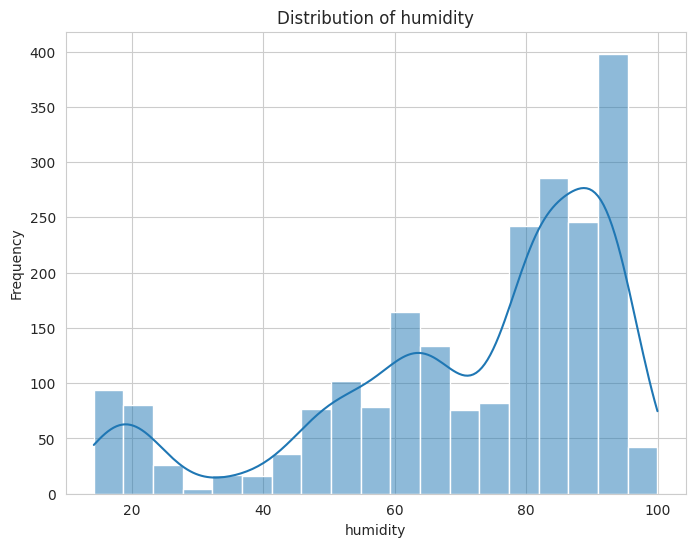

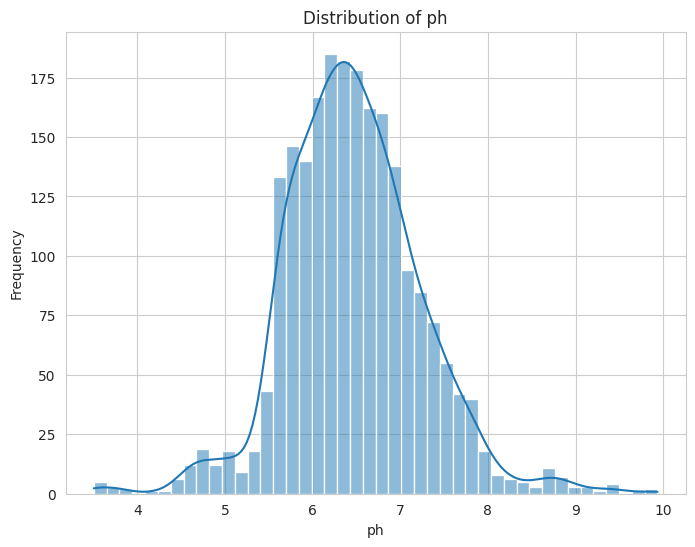

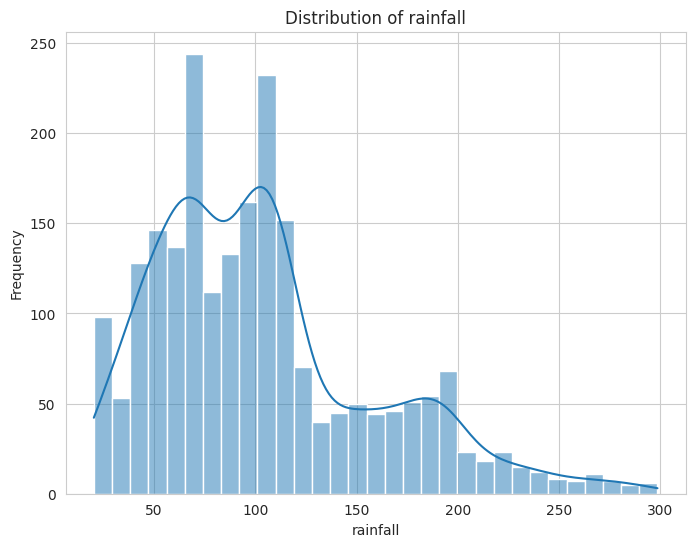

In [ ]:
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

for feature in numerical_features:
  plt.figure(figsize=(8, 6))  # Adjust figure size as needed
  sns.histplot(crop[feature], kde=True)  # kde adds a kernel density estimate
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.show()

# Count of different crops


<ipython-input-8-5d76f33b688b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=crop, order=crop['label'].value_counts().index, palette='viridis')


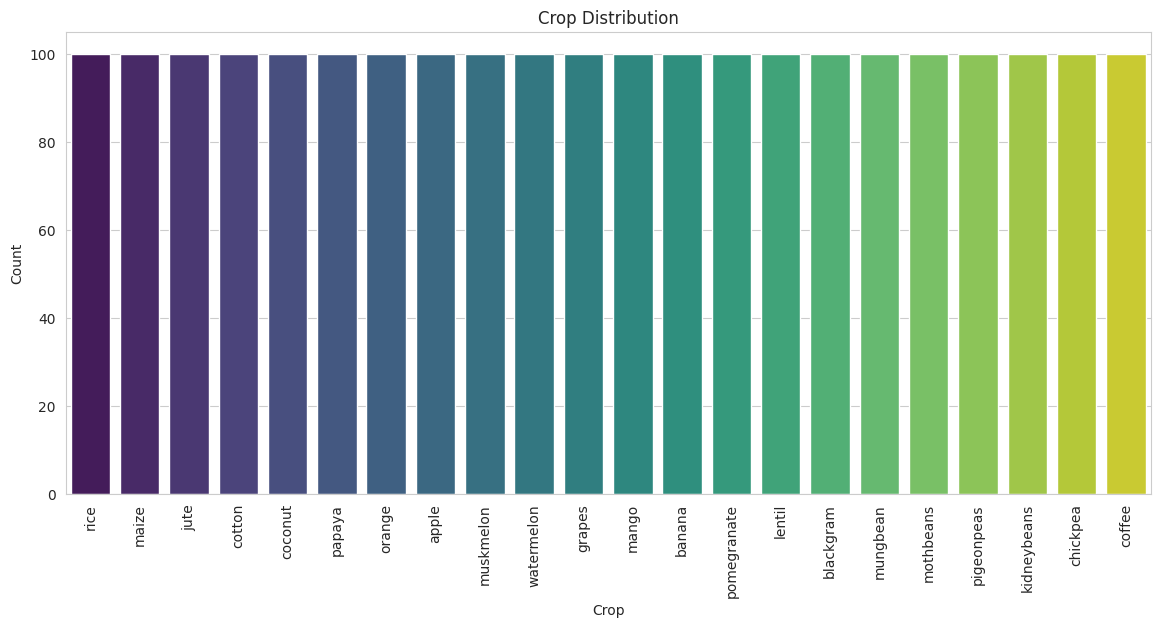

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(x='label', data=crop, order=crop['label'].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Crop Distribution')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.show()

# Bivariate Analysis - Pairplot for selected features

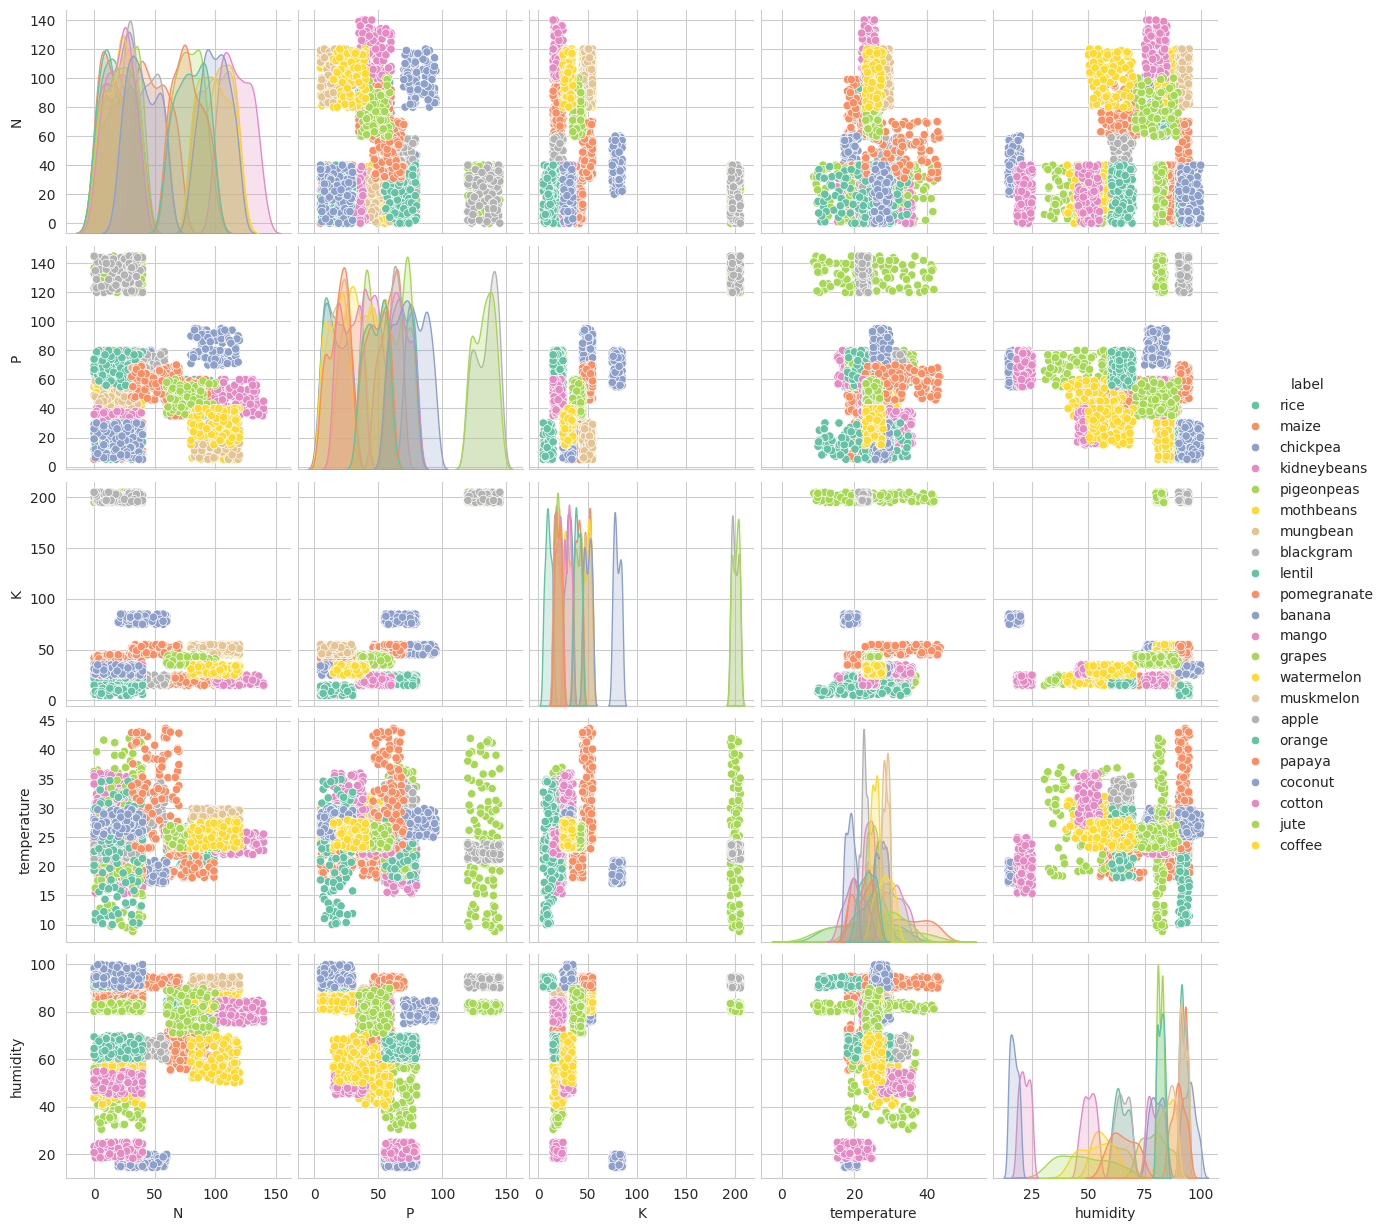

In [ ]:
sns.pairplot(crop[['N', 'P', 'K', 'temperature', 'humidity', 'label']], hue='label', palette='Set2')
plt.show()

# Correlation heatmap

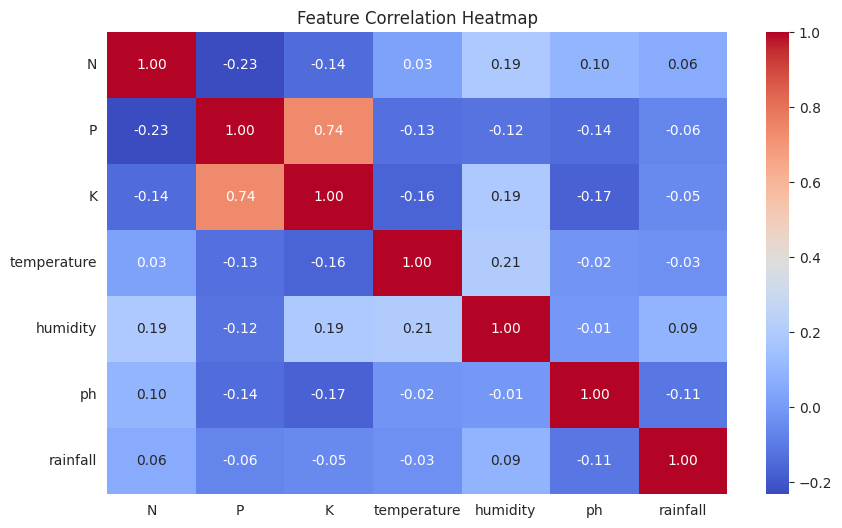

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = crop.drop(columns=['label']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Comparison of different nutrient levels across crops

<Figure size 1400x600 with 0 Axes>

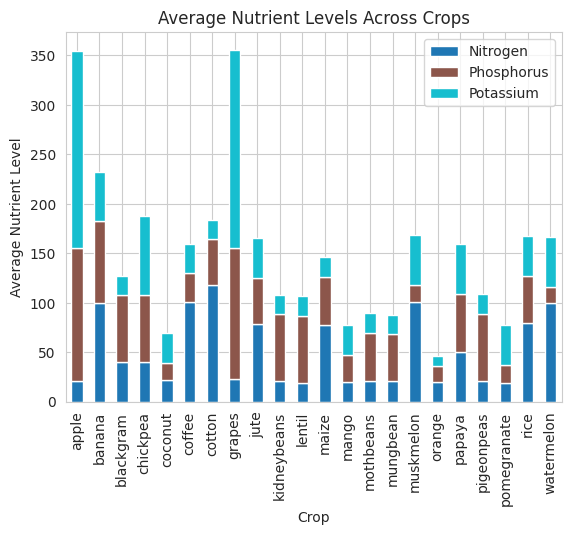

In [ ]:
plt.figure(figsize=(14, 6))
crop.groupby('label')[['N', 'P', 'K']].mean().plot(kind='bar', stacked=True, colormap='tab10')
plt.title('Average Nutrient Levels Across Crops')
plt.xlabel('Crop')
plt.ylabel('Average Nutrient Level')
plt.legend(['Nitrogen', 'Phosphorus', 'Potassium'])
plt.show()

# Boxplot to check for outliers in temperature

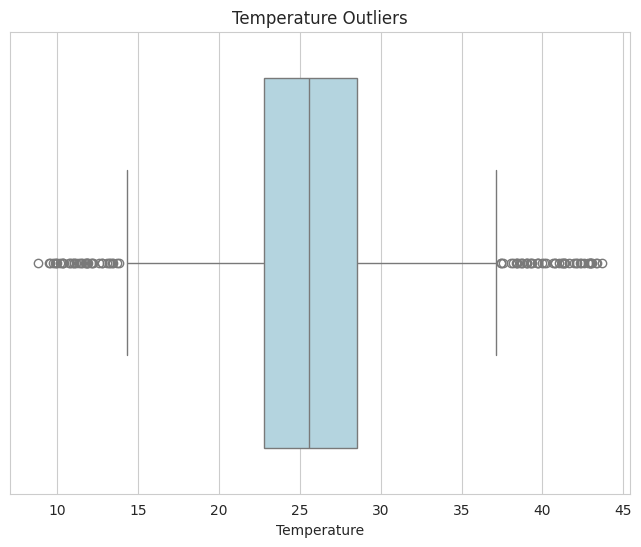

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=crop['temperature'], color='lightblue')
plt.title('Temperature Outliers')
plt.xlabel('Temperature')
plt.show()